In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('../datasets/avocado.csv')
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = np.array(data.iloc[:, 8:10])
X = sc.fit_transform(X)
X

array([[-0.2326465 , -0.22235202],
       [-0.23156838, -0.22233464],
       [-0.23339891, -0.22231148],
       ...,
       [-0.23164379, -0.22256082],
       [-0.22954271, -0.2225293 ],
       [-0.22811058, -0.22262764]])

In [4]:
Y = np.array(data.iloc[:, 7]/10000)
Y

array([0.869687, 0.950556, 0.814535, ..., 0.939411, 1.096954, 1.201415])

In [5]:
model = LinearRegression().fit(X, Y)
print(f'Score is {model.score(X, Y)}')
print(f'Coeficients are {model.coef_}')
print(f'Intercept is {model.intercept_}')

Score is 0.9998882049242688
Coeficients are [76.19315275 24.22991316]
Intercept is 23.963920205983893


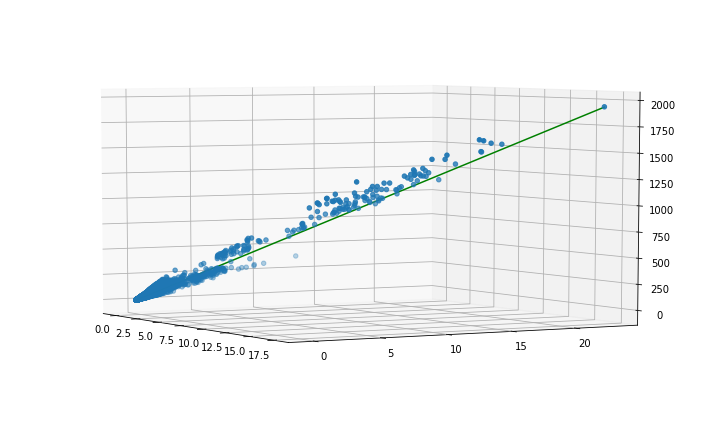

In [6]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
fig.set_size_inches(12.5, 7.5)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=X.T[0], ys=X.T[1], zs=Y)
ax.plot(xs=[max(X.T[0]), min(X.T[0])], ys=[max(X.T[1]), min(X.T[1])], zs=[max(model.predict(X)), min(model.predict(X))], color='green')
ax.view_init(5, -30)